In [1]:
import numpy as np
import pandas as pd

import exp3aux.exp3aux as ex3aux
from experiments2.auxiliary.auxiliary import construct_by_kmeans, construct_by_uniform, construct_by_quantiles
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import pandas as pd
from pgmpy.estimators import K2Score, BicScore

plt.rcParams.update({'font.size': 14})

imagespath = 'C:/Users/Acer/PycharmProjects/BAMTclone/BAMT/experiments2/images2'

In [2]:
cols = ['mean_right_dir', 'min_right_dir', 'max_right_dir',
                              'mean_wrong_dir', 'min_wrong_dir', 'max_wrong_dir',
                              'mean_asc', 'min_asc', 'max_asc',
                              'mean_desc', 'min_desc', 'max_desc',
                              'mean_wrong_edges', 'min_wrong_edges', 'max_wrong_edges',
                              'mean_indegree', 'min_indegree', 'max_indegree'] +\
                              [f"indegree for actual {k} indegree" for k in range(11)]

In [56]:
x = list(range(4, 16))
def plot(columns: list, data: pd.DataFrame, labels: list, ylabel: str):
    plt.figure(figsize=(18, 6), edgecolor="black")
    for i in range(len(columns)):
        plt.plot(x, data[columns[i]], label=labels[i])
    plt.xlabel("Number of features")
    plt.ylabel(ylabel)
    plt.grid(True, color="grey")
    plt.legend(loc="upper left")
    plt.xticks(x)

In [48]:
table = list()
for i in range(4, 16):
    print(f"{i} nodes")
    print("")
    table.append(ex3aux.simulation(i, scoring=("K2", K2Score), construction_method=construct_by_kmeans))

4 nodes



KeyboardInterrupt: 

In [14]:
res = pd.DataFrame([table[k] for k in range(12)], columns=cols)
res

,mean_right_dir,min_right_dir,max_right_dir,mean_wrong_dir,min_wrong_dir,max_wrong_dir,mean_asc,min_asc,max_asc,mean_desc,...,indegree for actual 1 indegree,indegree for actual 2 indegree,indegree for actual 3 indegree,indegree for actual 4 indegree,indegree for actual 5 indegree,indegree for actual 6 indegree,indegree for actual 7 indegree,indegree for actual 8 indegree,indegree for actual 9 indegree,indegree for actual 10 indegree
0,0.504167,0.222222,1.000000,0.400000,0.000000,0.666667,0.974359,0.833333,1.0,0.831790,...,1.371795,2.854167,4.166667,-inf,-inf,-inf,-inf,-inf,-inf,-inf
1,0.563889,0.250000,0.833333,0.300278,0.083333,0.666667,0.875817,0.000000,1.0,0.850556,...,1.690476,3.513889,4.000000,3.833333,-inf,-inf,-inf,-inf,-inf,-inf
2,0.533333,0.250000,0.944444,0.351944,0.055556,0.666667,0.878472,0.500000,1.0,0.894444,...,1.564103,3.146465,4.142857,3.333333,4.666667,-inf,-inf,-inf,-inf,-inf
3,0.587381,0.375000,0.733333,0.290972,0.041667,0.523810,0.887963,0.333333,1.0,0.867500,...,1.526042,3.410256,4.238095,4.750000,-inf,-inf,-inf,-inf,-inf,-inf
4,0.557467,0.333333,0.866667,0.314398,0.074074,0.555556,0.847953,0.000000,1.0,0.882500,...,1.511905,3.050926,4.722222,5.000000,5.000000,-inf,-inf,-inf,-inf,-inf
5,0.451273,0.066667,0.714286,0.297247,0.166667,0.600000,0.777222,0.555556,1.0,0.728135,...,2.362573,3.951852,3.933333,2.866667,-inf,-inf,-inf,-inf,-inf,-inf
6,0.484766,0.222222,0.809524,0.306068,0.166667,0.454545,0.771389,0.416667,1.0,0.801528,...,2.508187,3.630117,3.641026,2.333333,6.000000,-inf,-inf,-inf,-inf,-inf
7,0.472235,0.151515,0.666667,0.293238,0.060606,0.461538,0.753056,0.111111,1.0,0.789821,...,2.241389,3.402778,4.410256,3.958333,-inf,-inf,-inf,-inf,-inf,-inf
8,0.443829,0.121212,0.666667,0.315930,0.177778,0.545455,0.751825,0.400000,1.0,0.778750,...,1.908466,3.441975,4.032407,3.300000,2.000000,5.0,-inf,-inf,-inf,-inf
9,0.461831,0.272727,0.733333,0.335028,0.194444,0.484848,0.795099,0.555556,1.0,0.795771,...,2.262500,3.513158,4.261905,4.666667,4.000000,-inf,-inf,-inf,-inf,-inf


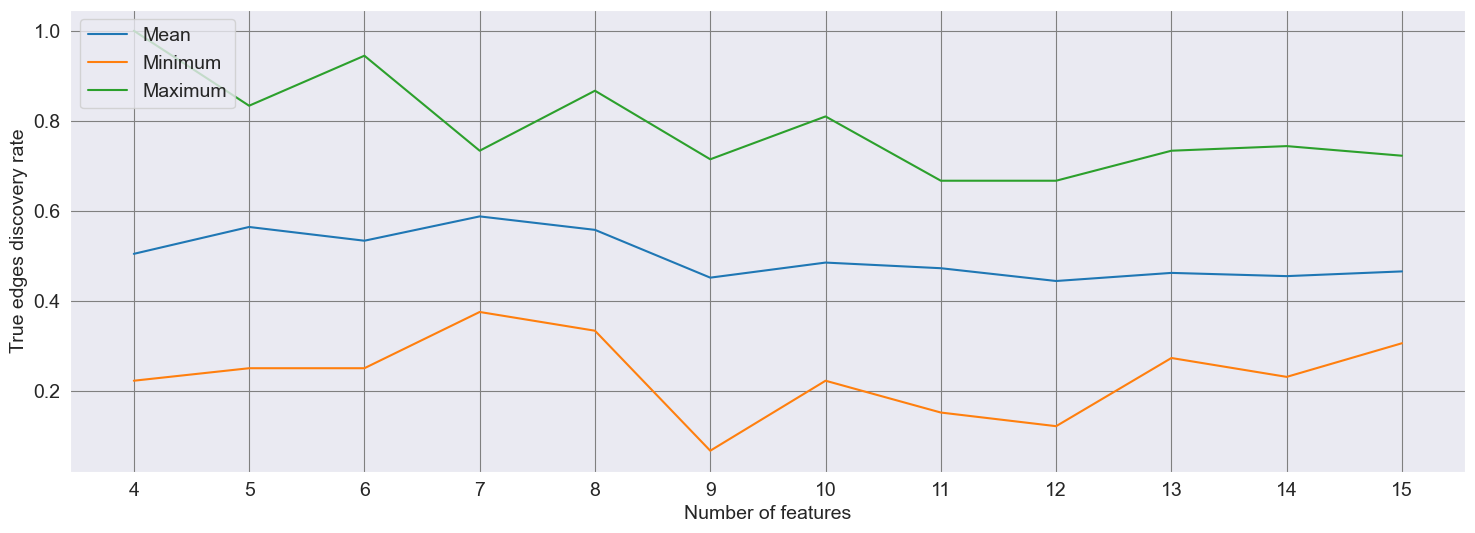

In [57]:
plot(['mean_right_dir', 'min_right_dir', 'max_right_dir'], res, ["Mean", "Minimum", "Maximum"], "True edges discovery rate")

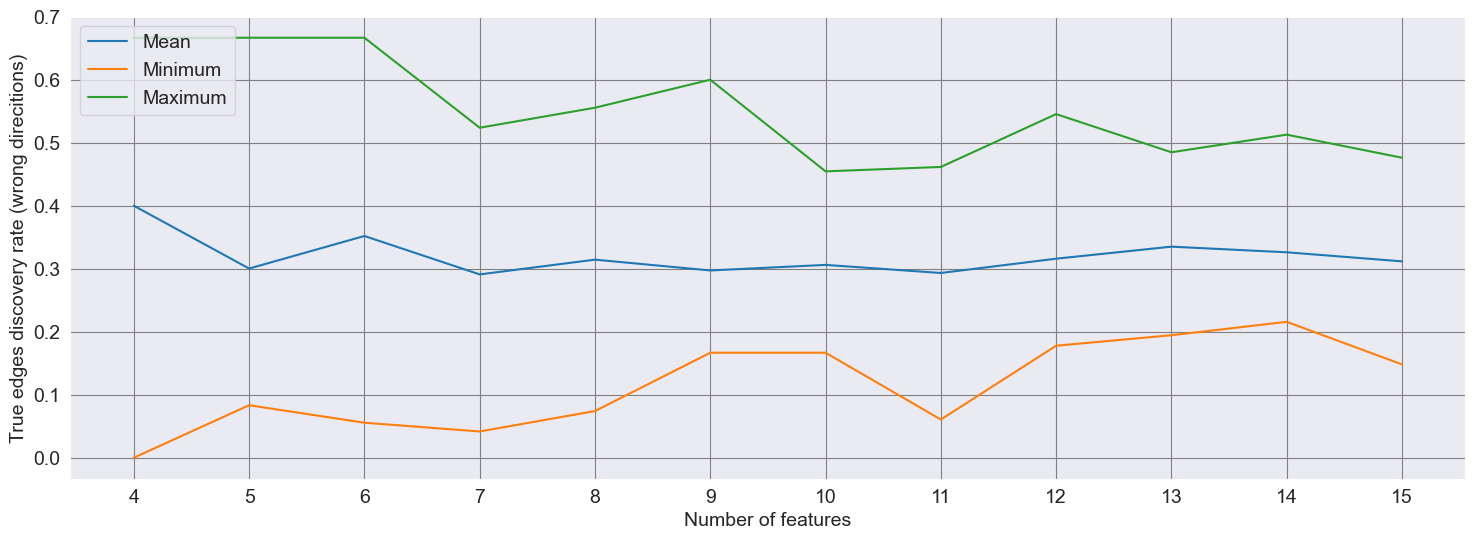

In [58]:
plot(['mean_wrong_dir', 'min_wrong_dir', 'max_wrong_dir'], res, ["Mean", "Minimum", "Maximum"], "True edges discovery rate (wrong direcitions)")

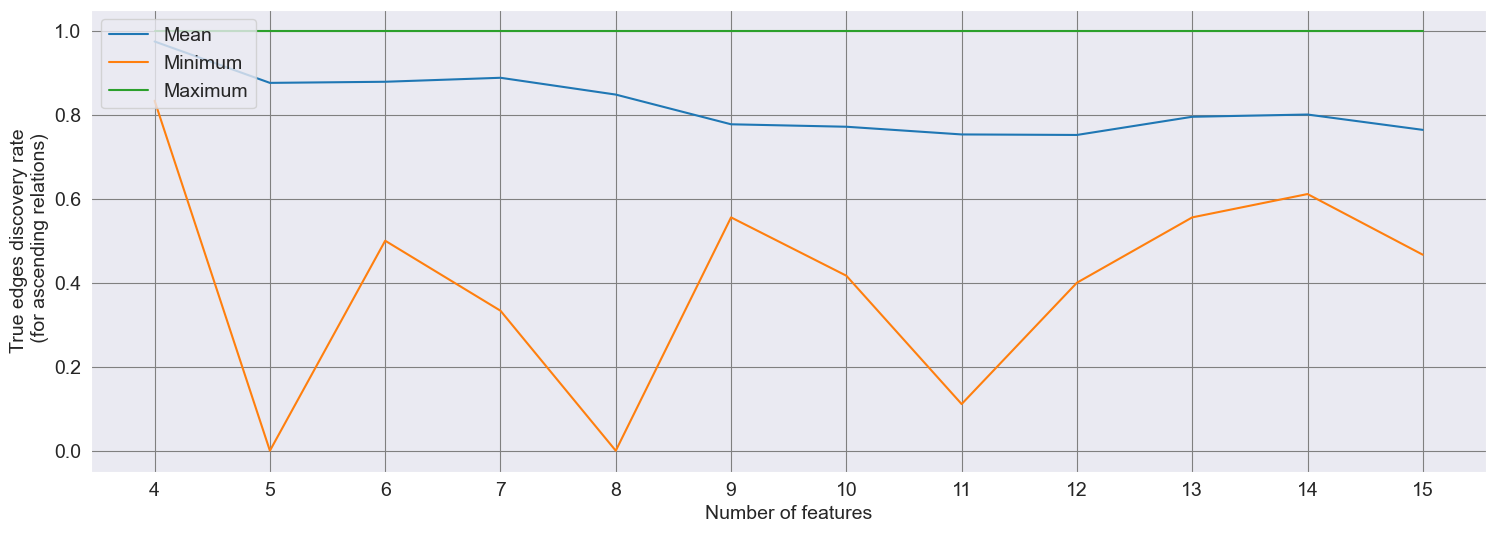

In [59]:
plot(['mean_asc', 'min_asc', 'max_asc'], res, ["Mean", "Minimum", "Maximum"], "True edges discovery rate\n (for ascending relations)")

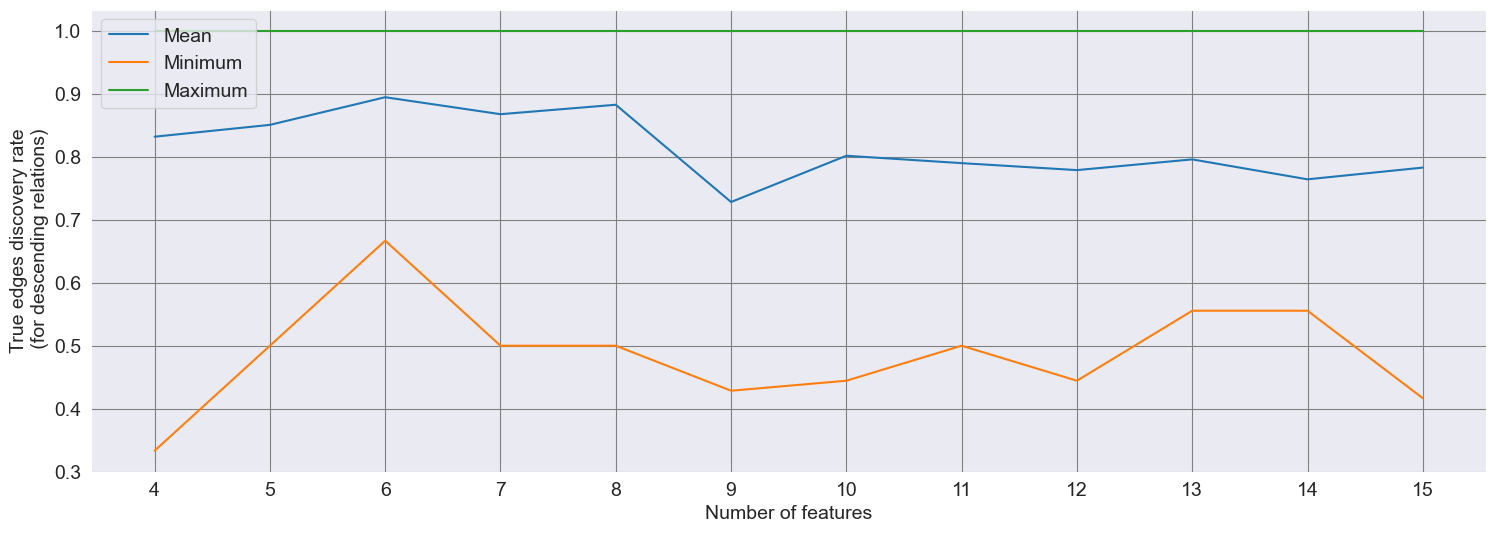

In [60]:
plot(['mean_desc', 'min_desc', 'max_desc'], res, ["Mean", "Minimum", "Maximum"], "True edges discovery rate\n (for descending relations)")

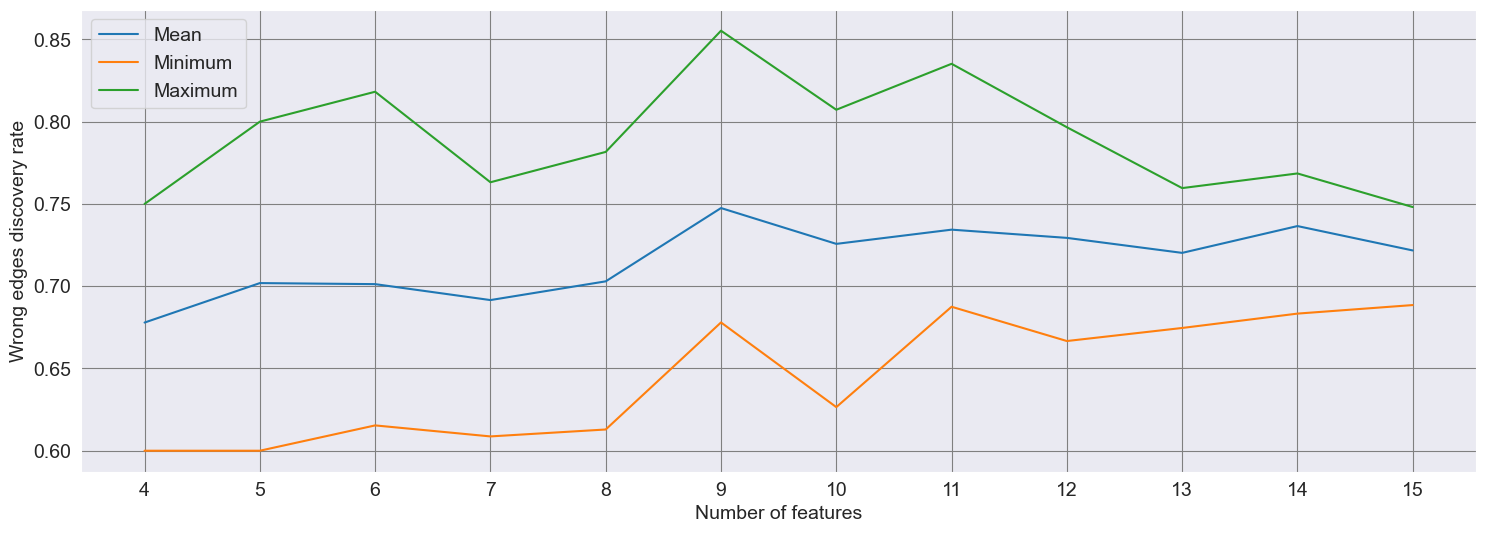

In [61]:
plot(['mean_wrong_edges', 'min_wrong_edges', 'max_wrong_edges'], res, ["Mean", "Minimum", "Maximum"], "Wrong edges discovery rate")

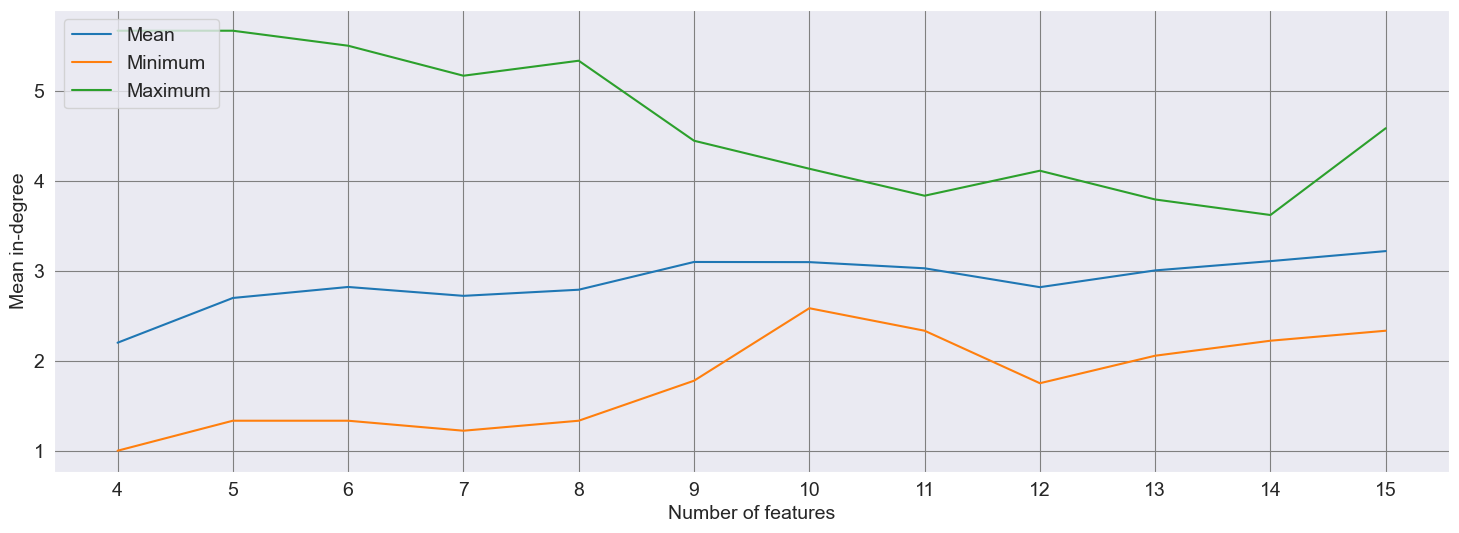

In [62]:
plot(['mean_indegree', 'min_indegree', 'max_indegree'], res, ["Mean", "Minimum", "Maximum"], "Mean in-degree")

In [6]:
table1 = list()
for i in range(4, 16):
    print(f"{i} nodes")
    print("")
    table1.append(ex3aux.simulation(i, scoring=("K2", K2Score), transitive_mode=True, construction_method=construct_by_kmeans))

4 nodes

5 nodes1

6 nodes1

7 nodes1

8 nodes1

9 nodes1

10 nodes

11 nodes

12 nodes

13 nodes

14 nodes

15 nodes



In [21]:
res1 = pd.DataFrame([table1[k] for k in range(12)], columns=cols)
res1

,mean_right_dir,min_right_dir,max_right_dir,mean_wrong_dir,min_wrong_dir,max_wrong_dir,mean_asc,min_asc,max_asc,mean_desc,...,indegree for actual 1 indegree,indegree for actual 2 indegree,indegree for actual 3 indegree,indegree for actual 4 indegree,indegree for actual 5 indegree,indegree for actual 6 indegree,indegree for actual 7 indegree,indegree for actual 8 indegree,indegree for actual 9 indegree,indegree for actual 10 indegree
0,0.504167,0.222222,1.000000,0.400000,0.000000,0.666667,0.974359,0.833333,1.000000,0.831790,...,1.371795,2.854167,4.166667,-inf,-inf,-inf,-inf,-inf,-inf,-inf
1,0.563889,0.250000,0.833333,0.300278,0.083333,0.666667,0.875817,0.000000,1.000000,0.850556,...,1.690476,3.513889,4.000000,3.833333,-inf,-inf,-inf,-inf,-inf,-inf
2,0.533333,0.250000,0.944444,0.351944,0.055556,0.666667,0.878472,0.500000,1.000000,0.894444,...,1.564103,3.146465,4.142857,3.333333,4.666667,-inf,-inf,-inf,-inf,-inf
3,0.587381,0.375000,0.733333,0.290972,0.041667,0.523810,0.887963,0.333333,1.000000,0.867500,...,1.526042,3.410256,4.238095,4.750000,-inf,-inf,-inf,-inf,-inf,-inf
4,0.557467,0.333333,0.866667,0.314398,0.074074,0.555556,0.847953,0.000000,1.000000,0.882500,...,1.511905,3.050926,4.722222,5.000000,5.000000,-inf,-inf,-inf,-inf,-inf
5,0.377658,0.095238,0.814815,0.286118,0.111111,0.452381,0.685503,0.333333,1.000000,0.650149,...,2.585673,4.130556,3.600000,3.533333,-inf,-inf,-inf,-inf,-inf,-inf
6,0.409290,0.192982,0.703704,0.283720,0.150000,0.444444,0.726693,0.466667,1.000000,0.676002,...,2.760819,3.571637,4.128205,3.333333,5.000000,-inf,-inf,-inf,-inf,-inf
7,0.384953,0.166667,0.564103,0.289896,0.116667,0.404762,0.691322,0.407407,0.958333,0.665352,...,2.233611,3.635802,4.410256,4.083333,-inf,-inf,-inf,-inf,-inf,-inf
8,0.367584,0.087719,0.641026,0.266327,0.125000,0.438596,0.585222,0.285714,0.833333,0.675359,...,2.166534,3.640432,4.407407,3.700000,2.333333,5.0,-inf,-inf,-inf,-inf
9,0.367802,0.185185,0.600000,0.300234,0.158730,0.472222,0.661310,0.515152,0.952381,0.689327,...,2.439722,3.583333,4.250000,3.555556,5.000000,-inf,-inf,-inf,-inf,-inf


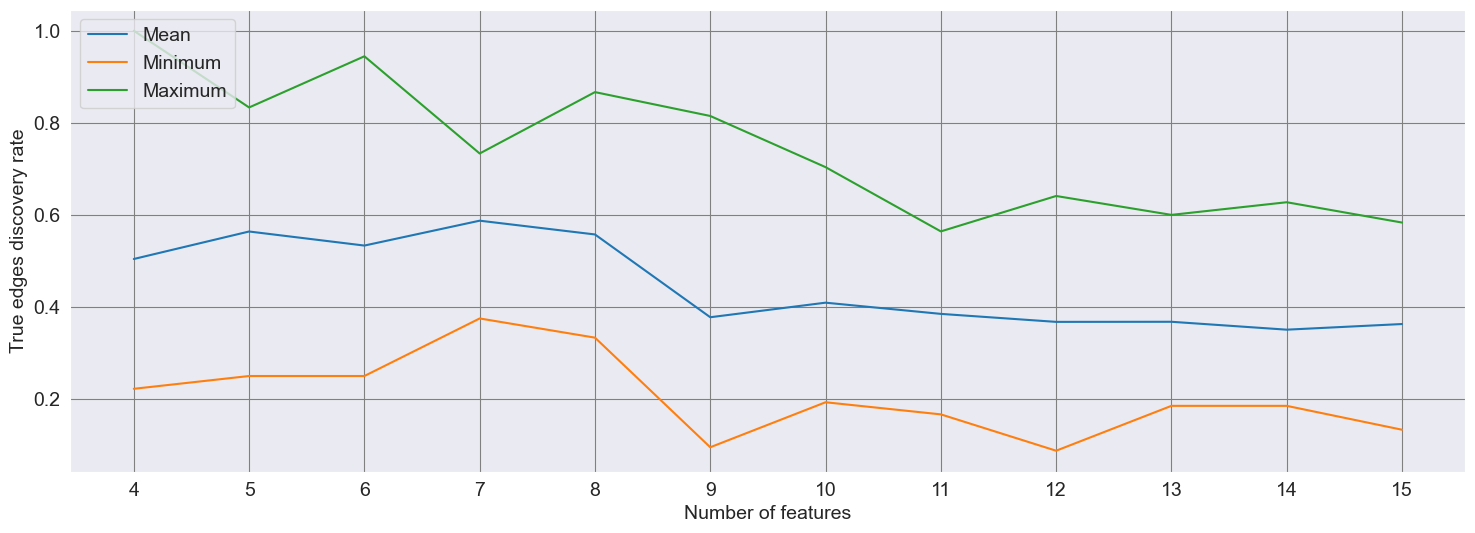

In [63]:
plot(['mean_right_dir', 'min_right_dir', 'max_right_dir'], res1, ["Mean", "Minimum", "Maximum"], "True edges discovery rate")

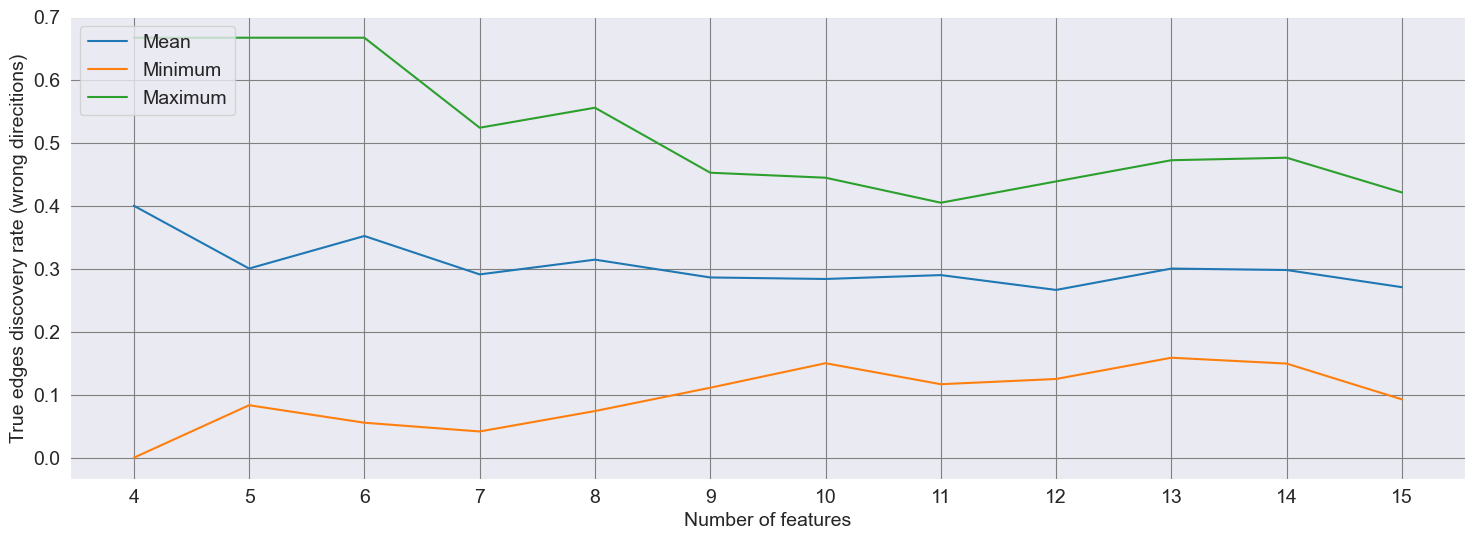

In [64]:
plot(['mean_wrong_dir', 'min_wrong_dir', 'max_wrong_dir'], res1, ["Mean", "Minimum", "Maximum"], "True edges discovery rate (wrong direcitions)")

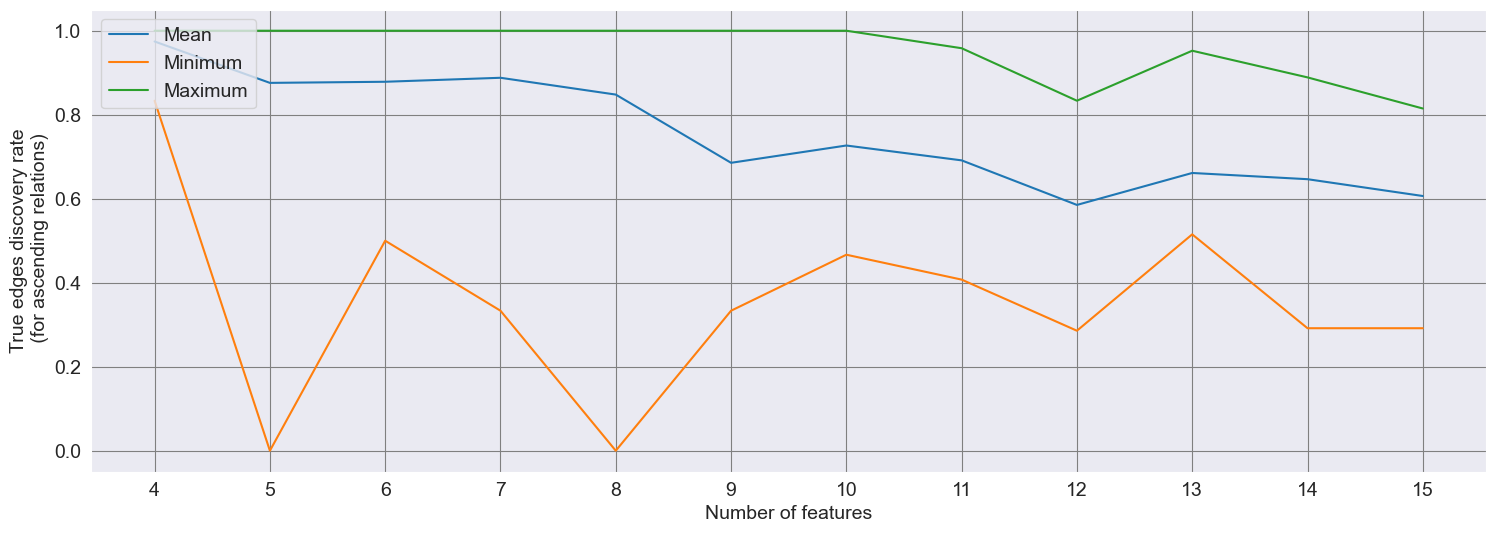

In [65]:
plot(['mean_asc', 'min_asc', 'max_asc'], res1, ["Mean", "Minimum", "Maximum"], "True edges discovery rate\n (for ascending relations)")

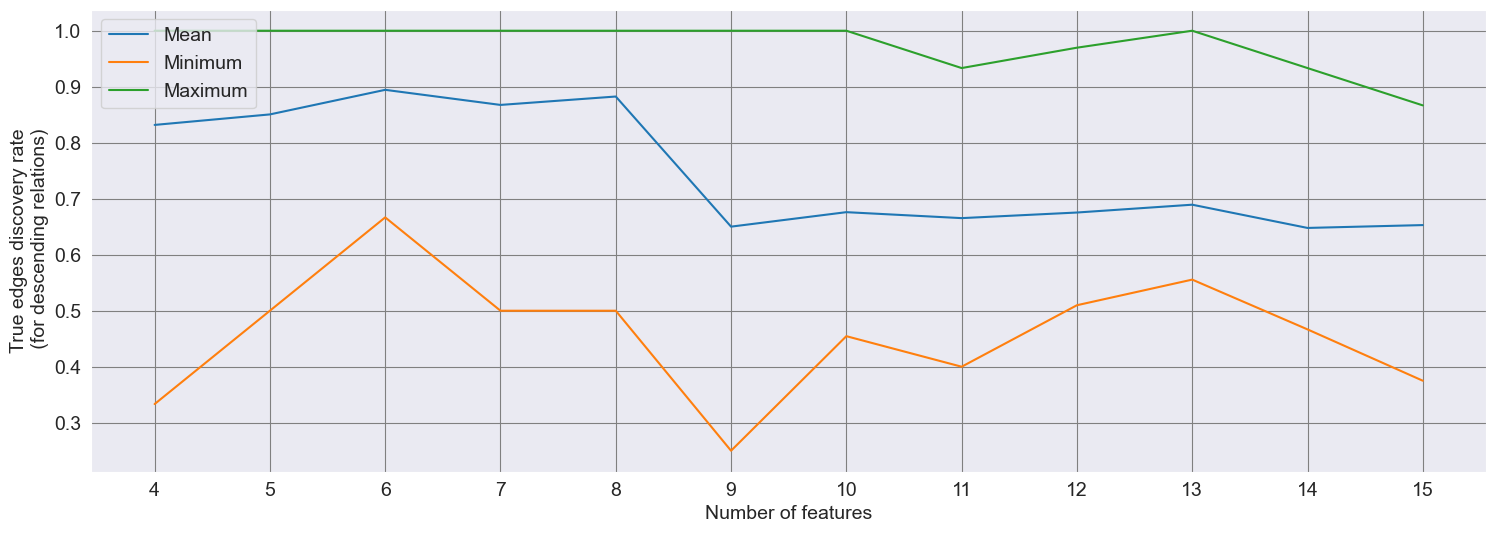

In [66]:
plot(['mean_desc', 'min_desc', 'max_desc'], res1, ["Mean", "Minimum", "Maximum"], "True edges discovery rate\n (for descending relations)")

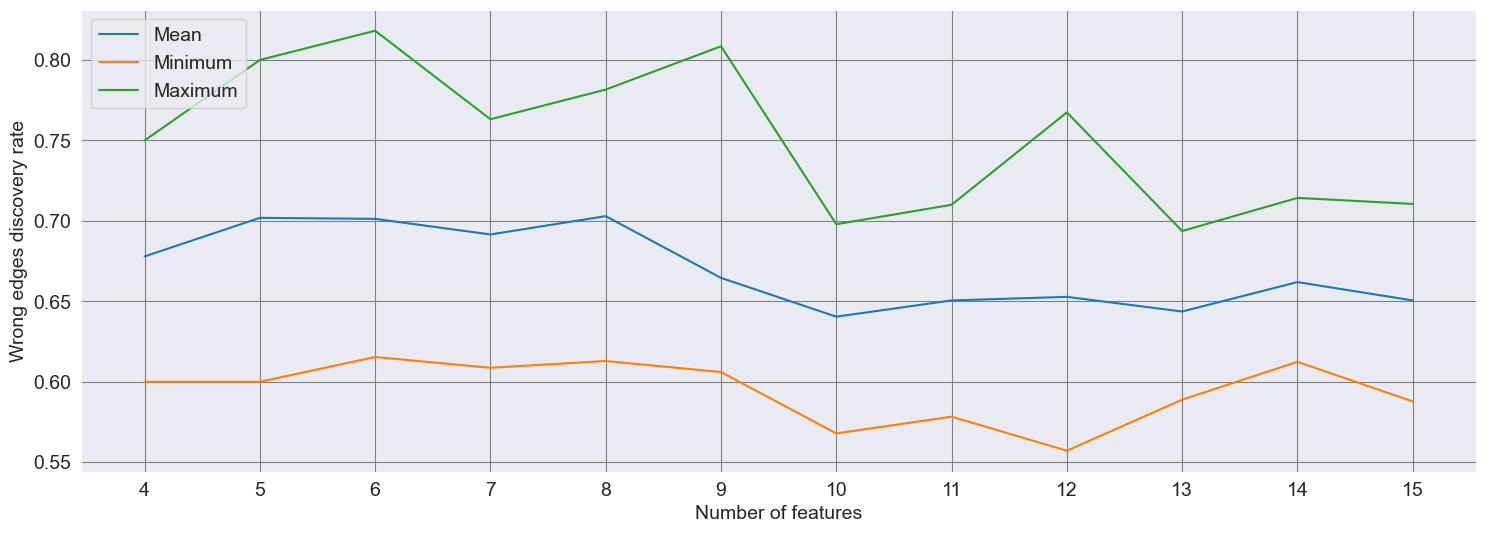

In [67]:
plot(['mean_wrong_edges', 'min_wrong_edges', 'max_wrong_edges'], res1, ["Mean", "Minimum", "Maximum"], "Wrong edges discovery rate")

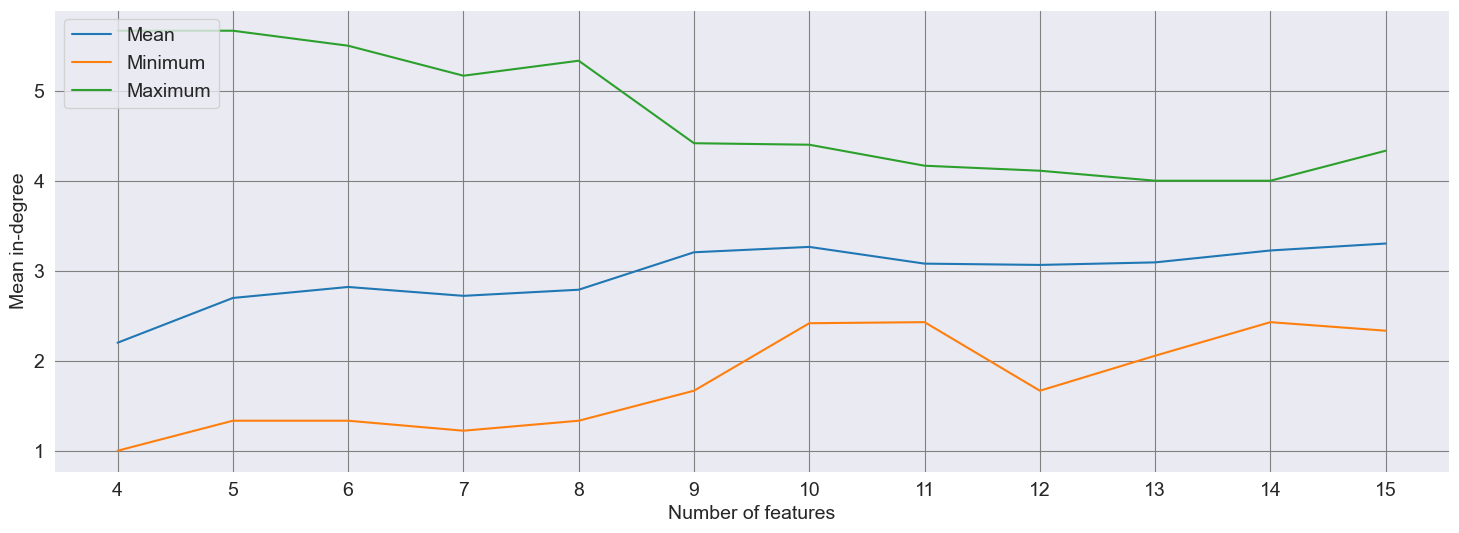

In [68]:
plot(['mean_indegree', 'min_indegree', 'max_indegree'], res1, ["Mean", "Minimum", "Maximum"], "Mean in-degree")

In [28]:
table2 = list()
for i in range(4, 16):
    print(f"{i} nodes")
    print("")
    table2.append(ex3aux.simulation(i, scoring=("K2", BicScore), construction_method=construct_by_kmeans))

4 nodes

5 nodes1

6 nodes1

7 nodes1

8 nodes1

9 nodes1

10 nodes

11 nodes

12 nodes

13 nodes

14 nodes

15 nodes



In [38]:
res2 = pd.DataFrame([table2[k] for k in range(12)], columns=cols)
res2

,mean_right_dir,min_right_dir,max_right_dir,mean_wrong_dir,min_wrong_dir,max_wrong_dir,mean_asc,min_asc,max_asc,mean_desc,...,indegree for actual 1 indegree,indegree for actual 2 indegree,indegree for actual 3 indegree,indegree for actual 4 indegree,indegree for actual 5 indegree,indegree for actual 6 indegree,indegree for actual 7 indegree,indegree for actual 8 indegree,indegree for actual 9 indegree,indegree for actual 10 indegree
0,0.558333,0.000000,1.000000,0.334722,0.000000,1.000000,0.961538,0.666667,1.0,0.830247,...,1.487179,2.354167,2.666667,-inf,-inf,-inf,-inf,-inf,-inf,-inf
1,0.569722,0.222222,1.000000,0.282500,0.000000,0.555556,0.875817,0.000000,1.0,0.838333,...,1.511905,2.597222,3.000000,3.166667,-inf,-inf,-inf,-inf,-inf,-inf
2,0.503849,0.238095,0.833333,0.351468,0.111111,0.666667,0.827778,0.333333,1.0,0.865205,...,1.282051,2.570707,3.285714,2.000000,2.666667,-inf,-inf,-inf,-inf,-inf
3,0.514087,0.285714,0.833333,0.360198,0.166667,0.583333,0.884259,0.333333,1.0,0.859167,...,1.343750,2.743590,3.047619,3.583333,-inf,-inf,-inf,-inf,-inf,-inf
4,0.529947,0.300000,0.833333,0.309610,0.125000,0.666667,0.828655,0.000000,1.0,0.851111,...,1.275794,2.606481,3.444444,3.333333,2.916667,-inf,-inf,-inf,-inf,-inf
5,0.426628,0.111111,0.809524,0.271944,0.111111,0.611111,0.726944,0.333333,1.0,0.667857,...,1.748830,2.950000,2.583333,2.666667,-inf,-inf,-inf,-inf,-inf,-inf
6,0.463077,0.238095,0.740741,0.284850,0.151515,0.444444,0.733889,0.333333,1.0,0.757242,...,1.994152,2.647661,2.910256,2.000000,3.666667,-inf,-inf,-inf,-inf,-inf
7,0.426938,0.181818,0.633333,0.291398,0.090909,0.566667,0.713333,0.166667,1.0,0.739907,...,1.740000,2.720679,2.957265,3.166667,-inf,-inf,-inf,-inf,-inf,-inf
8,0.459487,0.181818,0.743590,0.257355,0.076923,0.393939,0.688730,0.333333,1.0,0.749392,...,1.706393,2.772222,2.944444,2.766667,3.333333,4.0,-inf,-inf,-inf,-inf
9,0.428091,0.190476,0.641026,0.324709,0.102564,0.461538,0.736171,0.388889,1.0,0.763019,...,1.827778,2.767544,2.750000,3.222222,3.333333,-inf,-inf,-inf,-inf,-inf


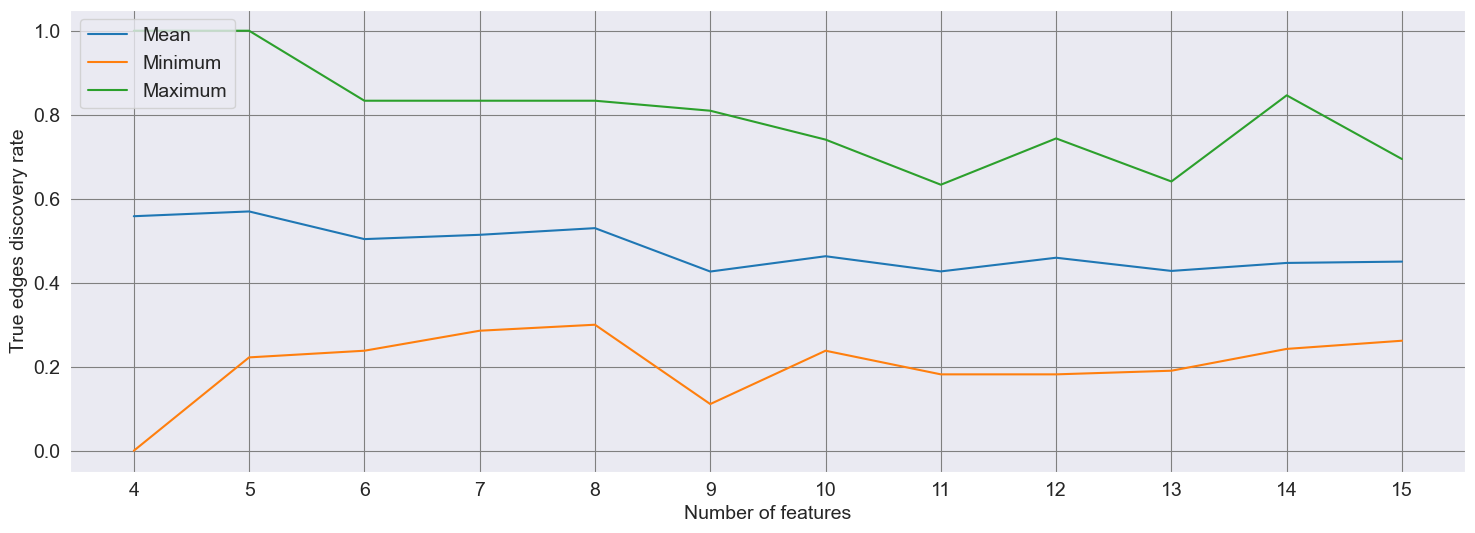

In [69]:
plot(['mean_right_dir', 'min_right_dir', 'max_right_dir'], res2, ["Mean", "Minimum", "Maximum"], "True edges discovery rate")

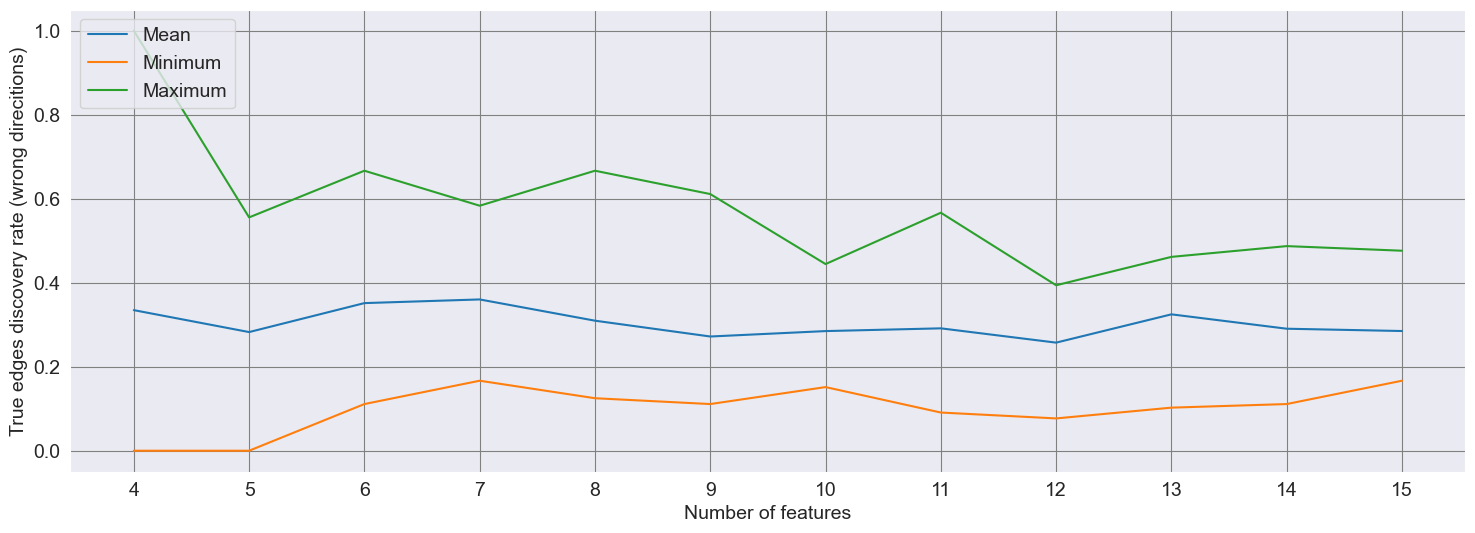

In [70]:
plot(['mean_wrong_dir', 'min_wrong_dir', 'max_wrong_dir'], res2, ["Mean", "Minimum", "Maximum"], "True edges discovery rate (wrong direcitions)")

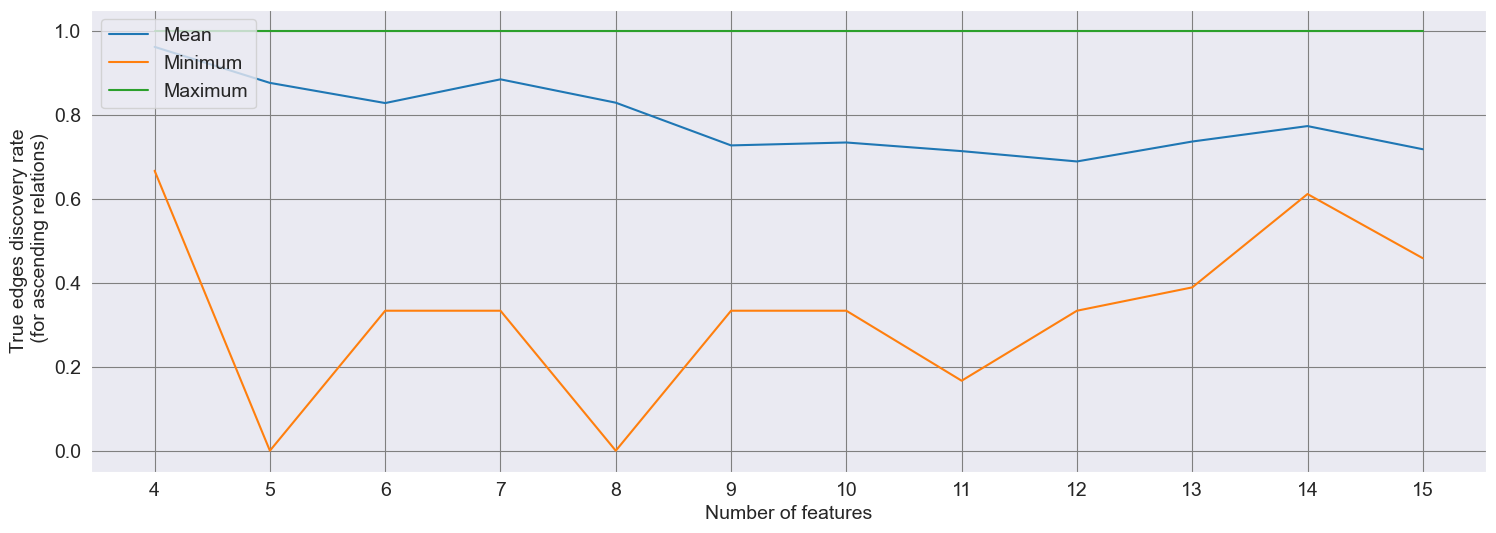

In [71]:
plot(['mean_asc', 'min_asc', 'max_asc'], res2, ["Mean", "Minimum", "Maximum"], "True edges discovery rate\n (for ascending relations)")

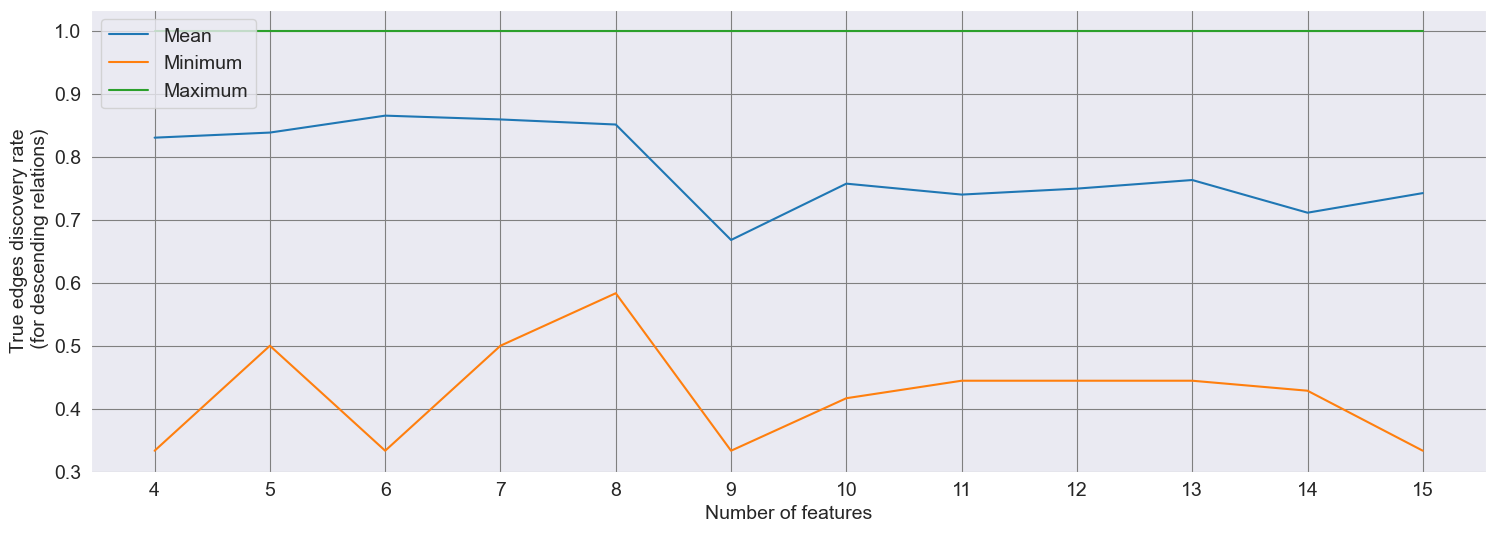

In [72]:
plot(['mean_desc', 'min_desc', 'max_desc'], res2, ["Mean", "Minimum", "Maximum"], "True edges discovery rate\n (for descending relations)")

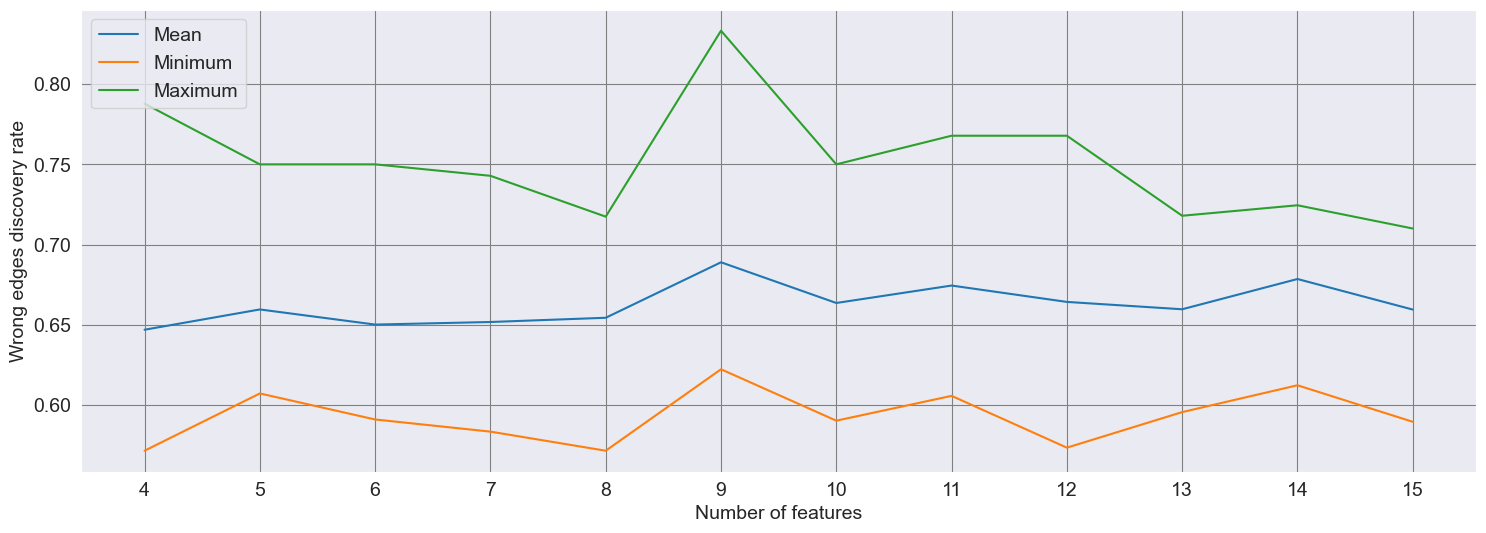

In [73]:
plot(['mean_wrong_edges', 'min_wrong_edges', 'max_wrong_edges'], res2, ["Mean", "Minimum", "Maximum"], "Wrong edges discovery rate")

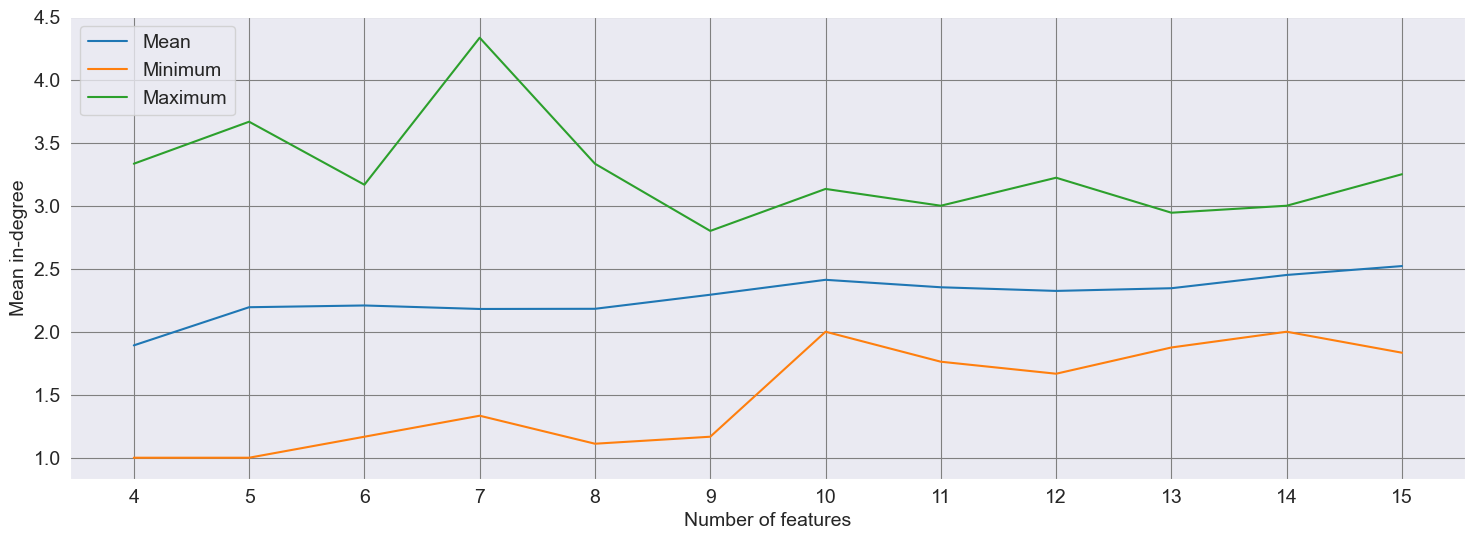

In [74]:
plot(['mean_indegree', 'min_indegree', 'max_indegree'], res2, ["Mean", "Minimum", "Maximum"], "Mean in-degree")

In [36]:
table3 = list()
for i in range(4, 16):
    print(f"{i} nodes")
    print("")
    table3.append(ex3aux.simulation(i, scoring=("K2", BicScore), transitive_mode=True, construction_method=construct_by_kmeans))

4 nodes

5 nodes1

6 nodes1

7 nodes1

8 nodes1

9 nodes1

10 nodes

11 nodes

12 nodes

13 nodes

14 nodes

15 nodes



In [37]:
res3 = pd.DataFrame([table3[k] for k in range(12)], columns=cols)
res3

,mean_right_dir,min_right_dir,max_right_dir,mean_wrong_dir,min_wrong_dir,max_wrong_dir,mean_asc,min_asc,max_asc,mean_desc,...,indegree for actual 1 indegree,indegree for actual 2 indegree,indegree for actual 3 indegree,indegree for actual 4 indegree,indegree for actual 5 indegree,indegree for actual 6 indegree,indegree for actual 7 indegree,indegree for actual 8 indegree,indegree for actual 9 indegree,indegree for actual 10 indegree
0,0.558333,0.000000,1.000000,0.334722,0.000000,1.000000,0.961538,0.666667,1.000000,0.830247,...,1.487179,2.354167,2.666667,-inf,-inf,-inf,-inf,-inf,-inf,-inf
1,0.569722,0.222222,1.000000,0.282500,0.000000,0.555556,0.875817,0.000000,1.000000,0.838333,...,1.511905,2.597222,3.000000,3.166667,-inf,-inf,-inf,-inf,-inf,-inf
2,0.503849,0.238095,0.833333,0.351468,0.111111,0.666667,0.827778,0.333333,1.000000,0.865205,...,1.282051,2.570707,3.285714,2.000000,2.666667,-inf,-inf,-inf,-inf,-inf
3,0.514087,0.285714,0.833333,0.360198,0.166667,0.583333,0.884259,0.333333,1.000000,0.859167,...,1.343750,2.743590,3.047619,3.583333,-inf,-inf,-inf,-inf,-inf,-inf
4,0.529947,0.300000,0.833333,0.309610,0.125000,0.666667,0.828655,0.000000,1.000000,0.851111,...,1.275794,2.606481,3.444444,3.333333,2.916667,-inf,-inf,-inf,-inf,-inf
5,0.330775,0.074074,0.703704,0.230268,0.095238,0.370370,0.560556,0.000000,1.000000,0.560202,...,1.971053,2.961111,2.850000,2.666667,-inf,-inf,-inf,-inf,-inf,-inf
6,0.370857,0.148148,0.629630,0.229218,0.116667,0.311111,0.623896,0.291667,1.000000,0.593821,...,2.101170,2.725146,2.833333,2.000000,3.333333,-inf,-inf,-inf,-inf,-inf
7,0.330473,0.116667,0.523810,0.250358,0.100000,0.416667,0.575403,0.148148,0.888889,0.595502,...,1.925833,2.640432,2.769231,3.208333,-inf,-inf,-inf,-inf,-inf,-inf
8,0.311572,0.100000,0.615385,0.238071,0.083333,0.361111,0.485089,0.148148,0.700000,0.601390,...,1.829674,2.548148,2.921296,2.333333,3.333333,4.0,-inf,-inf,-inf,-inf
9,0.324167,0.144928,0.507246,0.266786,0.140351,0.500000,0.574416,0.435897,0.952381,0.616620,...,1.929444,2.820175,2.988095,2.444444,3.666667,-inf,-inf,-inf,-inf,-inf


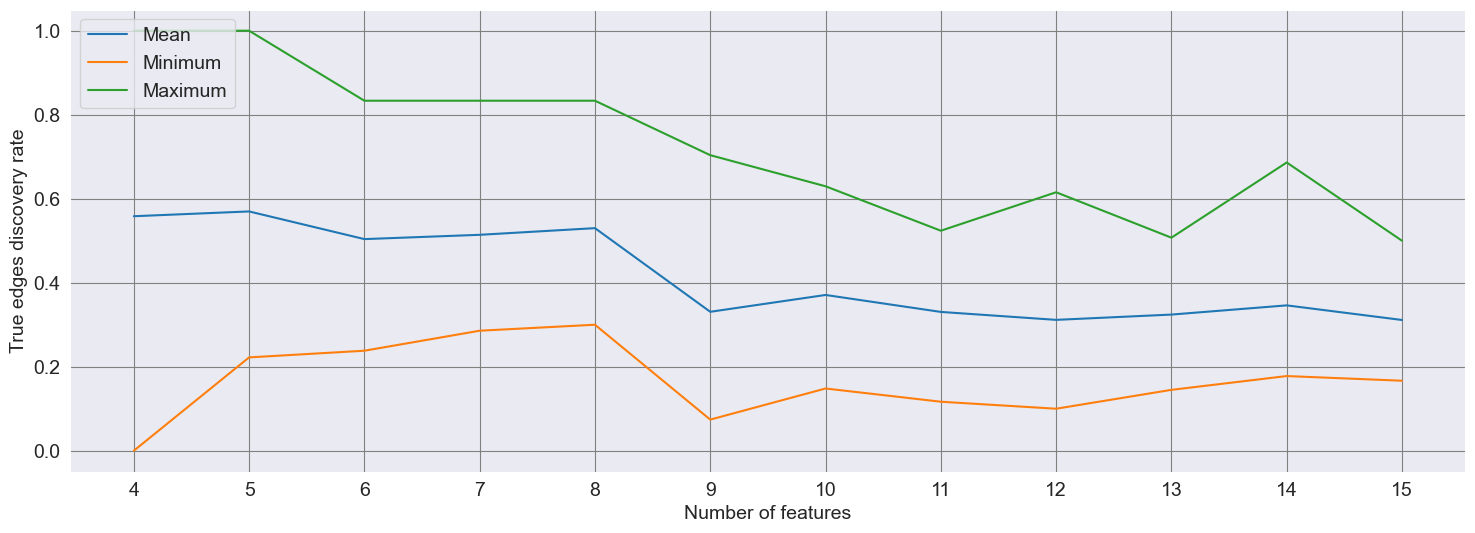

In [75]:
plot(['mean_right_dir', 'min_right_dir', 'max_right_dir'], res3, ["Mean", "Minimum", "Maximum"], "True edges discovery rate")

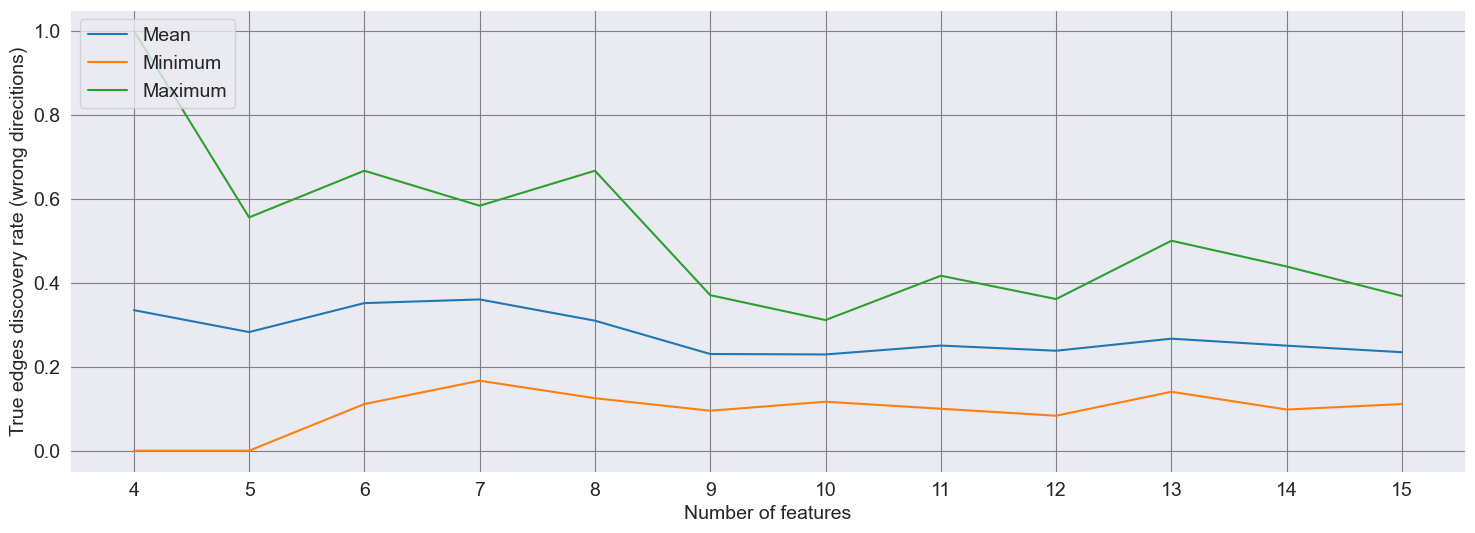

In [76]:
plot(['mean_wrong_dir', 'min_wrong_dir', 'max_wrong_dir'], res3, ["Mean", "Minimum", "Maximum"], "True edges discovery rate (wrong direcitions)")

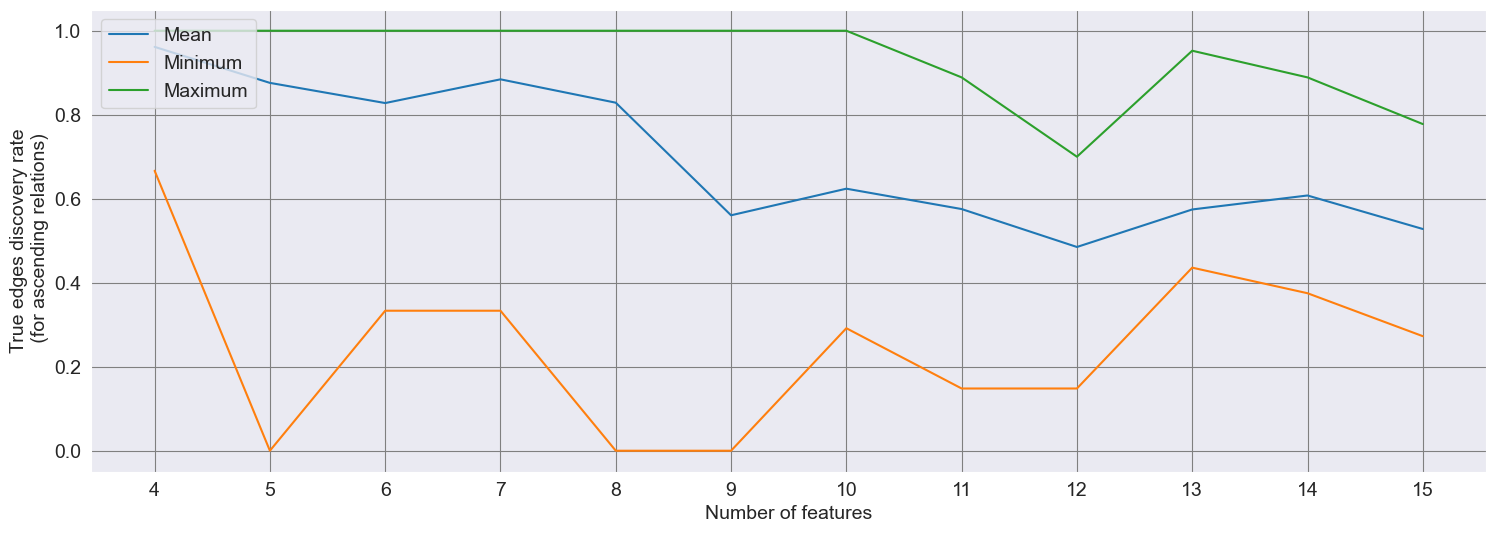

In [77]:
plot(['mean_asc', 'min_asc', 'max_asc'], res3, ["Mean", "Minimum", "Maximum"], "True edges discovery rate\n (for ascending relations)")

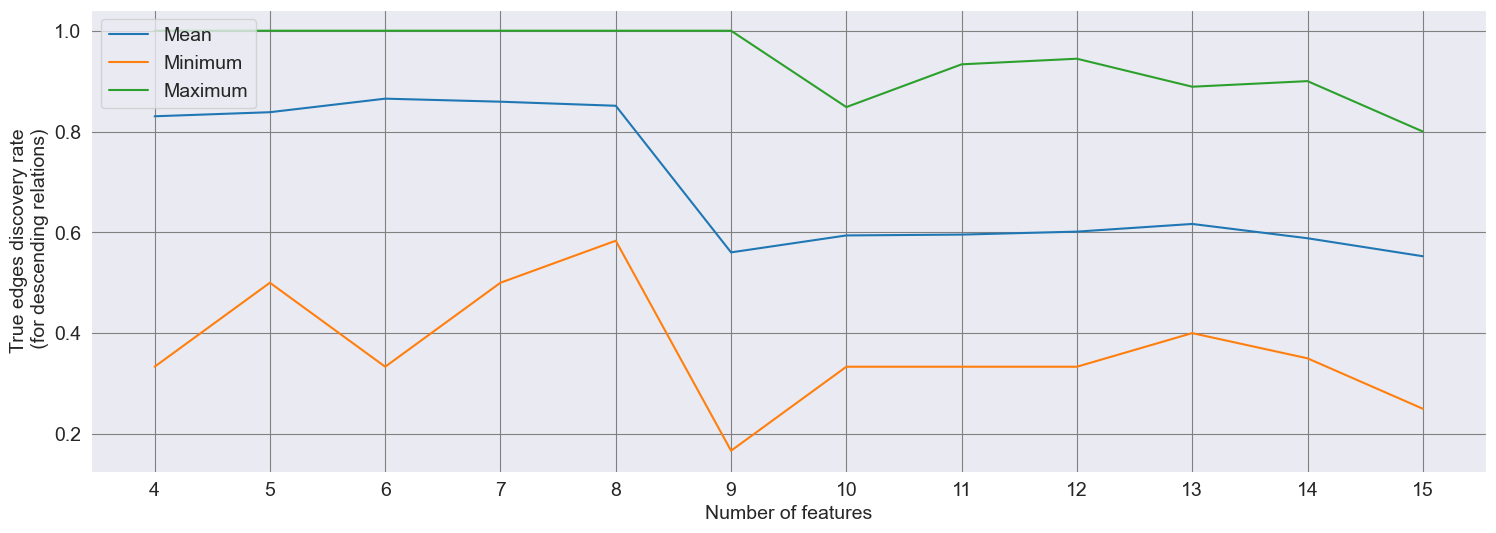

In [78]:
plot(['mean_desc', 'min_desc', 'max_desc'], res3, ["Mean", "Minimum", "Maximum"], "True edges discovery rate\n (for descending relations)")

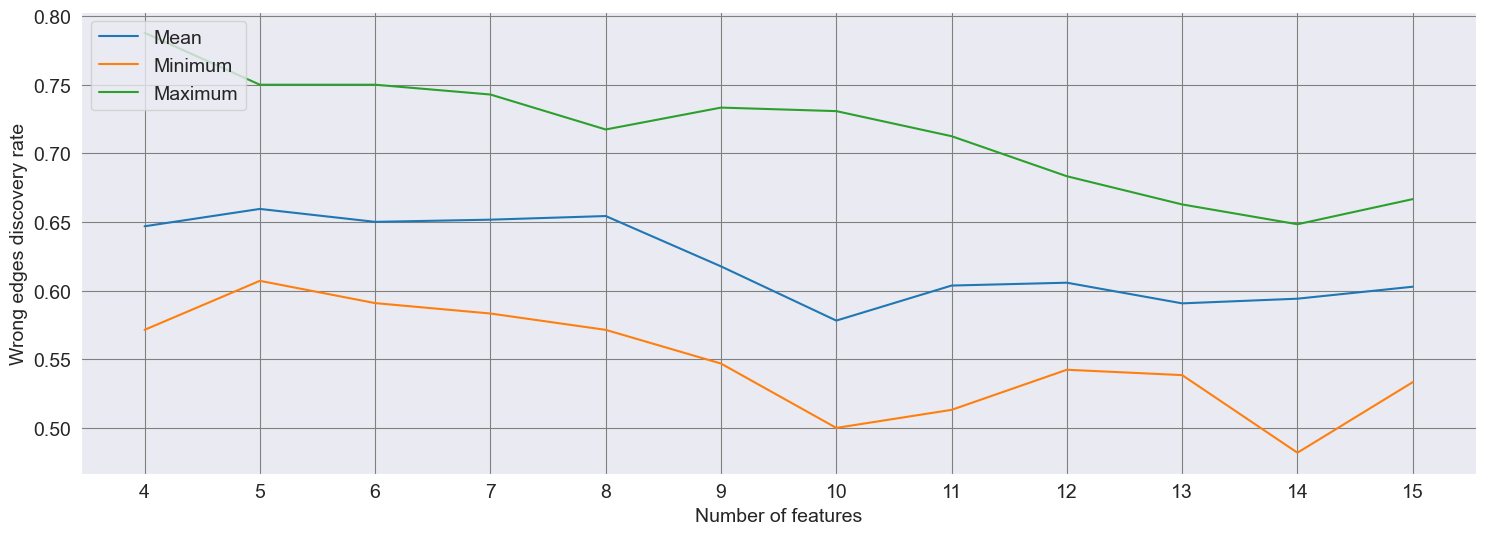

In [79]:
plot(['mean_wrong_edges', 'min_wrong_edges', 'max_wrong_edges'], res3, ["Mean", "Minimum", "Maximum"], "Wrong edges discovery rate")

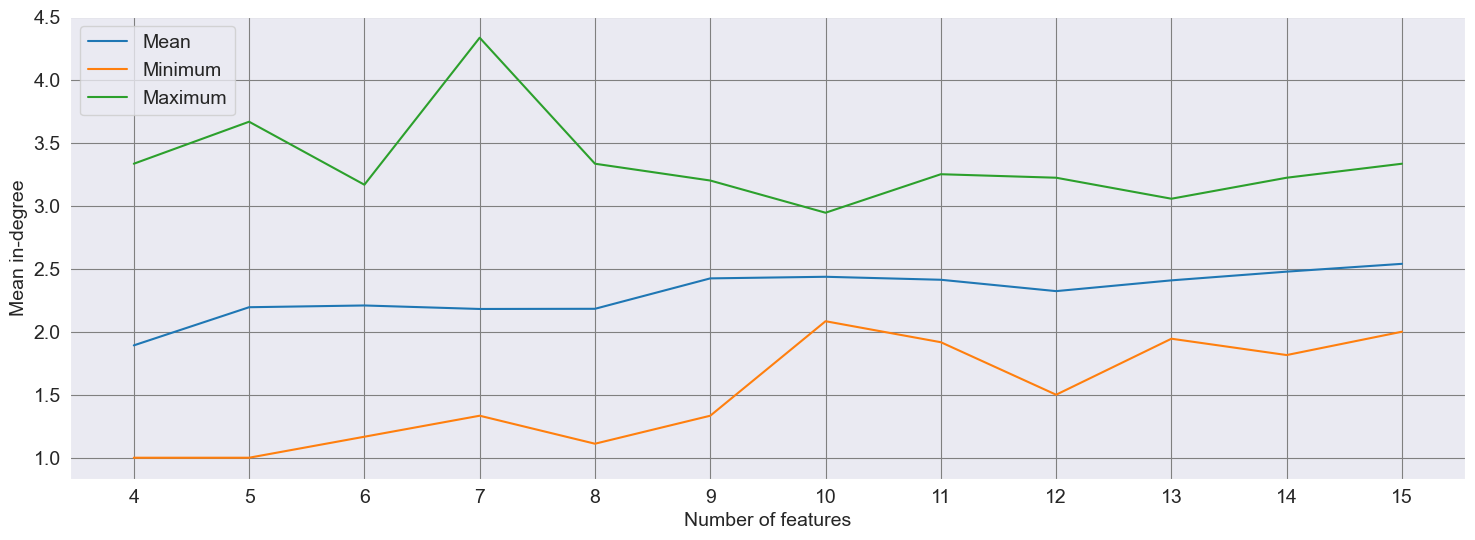

In [80]:
plot(['mean_indegree', 'min_indegree', 'max_indegree'], res3, ["Mean", "Minimum", "Maximum"], "Mean in-degree")

In [6]:
table4 = list()
for i in range(4, 16):
    print(f"{i} nodes")
    print("")
    table4.append(ex3aux.simulation(i, scoring=("K2", K2Score), construction_method=construct_by_uniform))

4 nodes

mean, min and max precision on right direction: 0.476 0.083 0.833 

mean, min and max precision on wrong direction: 0.382 0.167 0.667 

mean, min and max precision on ascending relations: 0.923 0.667 1.000 

mean, min and max precision on descending relations: 0.789 0.333 1.000 

mean, min and max precision on wrong edges among all in BN: 0.664 0.500 0.774 

mean, min and max mean in-degree: 3.950 2.000 10.000 

mean in-degrees in BNs according to the original ones
Supposed in-degree: 0, having 1.2944444444444447
Supposed in-degree: 1, having 1.4615384615384615
Supposed in-degree: 2, having 2.4166666666666665
Supposed in-degree: 3, having 3.333333333333333
Supposed in-degree: 4, having -inf
Supposed in-degree: 5, having -inf
Supposed in-degree: 6, having -inf
Supposed in-degree: 7, having -inf
Supposed in-degree: 8, having -inf
Supposed in-degree: 9, having -inf
Supposed in-degree: 10, having -inf
5 nodes

mean, min and max precision on right direction: 0.546 0.222 0.833 

mea

KeyboardInterrupt: 